In [2]:
import polars as pl
import polars.selectors as cs

### Batting Data 

In [3]:
(batting :=
 pl.read_csv('./data/lahman_1871-2024_csv/Batting.csv')
     .filter((pl.col('yearID') >= 2013) & (pl.col('stint') == 1))
    .select(cs.by_name('playerID', 'yearID') | cs.integer())
)




playerID,yearID,stint,G,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""aardsda01""",2013,1,43,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""aardsda01""",2015,1,33,null,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,null
"""abadfe01""",2013,1,39,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2014,1,69,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
"""abadfe01""",2015,1,62,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""zuninmi01""",2022,1,36,null,115,7,17,3,0,5,16,0,0,6,46,0,1,0,1,2,null
"""zuninmi01""",2023,1,42,42,124,11,22,7,0,3,11,0,0,15,61,0,1,0,0,3,null
"""zychto01""",2015,1,13,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null


### Fielding Stats

In [4]:
fielding = (
    pl.read_csv("./data/lahman_1871-2024_csv/Fielding.csv")
    .filter(pl.col("yearID") >= 2013)
    .filter(pl.col("POS").is_in(["OF", "LF", "CF", "RF"]))  
    .group_by(["playerID", "yearID"])
    .agg([
        pl.col("PO").sum().alias("PO"),
        pl.col("A").sum().alias("A"),
        pl.col("E").sum().alias("E"),
        pl.col("G").sum().alias("G"),
    ])
)
fielding

playerID,yearID,PO,A,E,G
str,i64,i64,i64,i64,i64
"""ludwiry01""",2014,135,1,0,92
"""polloaj01""",2013,246,8,2,118
"""taverle01""",2022,211,3,2,93
"""motteta01""",2017,27,2,0,19
"""gonzama01""",2021,22,0,0,14
…,…,…,…,…,…
"""dobbsgr01""",2013,1,0,0,1
"""engelad01""",2023,7,0,0,4
"""millebr02""",2016,0,0,1,1


### Allstar Data 

In [5]:
allstar_full = (
    pl.read_csv('./data/lahman_1871-2024_csv/AllstarFull.csv',
                columns=['playerID', 'yearID'])  
    .filter(pl.col('yearID') >= 2013)
    .unique()
    .with_columns(pl.lit('yes').alias('Allstar'))
)

allstar_full

playerID,yearID,Allstar
str,i64,str
"""degroja01""",2018,"""yes"""
"""scottta01""",2024,"""yes"""
"""arraelu01""",2022,"""yes"""
"""belljo02""",2019,"""yes"""
"""doolise01""",2018,"""yes"""
…,…,…
"""santihe01""",2015,"""yes"""
"""torregl01""",2018,"""yes"""
"""castrwi01""",2024,"""yes"""


### Combining Data - AllStar

In [6]:


(allstar_joined :=
 fielding
        .join(batting, on = ['playerID', 'yearID'], how='left', suffix = '_bat')
        .join(allstar_full, on=['playerID', 'yearID'], how='left', suffix='_allstar')
        .with_columns(pl.col("Allstar").fill_null('no'))
        .select(cs.by_name('Allstar') | cs.by_name('playerID', 'yearID') | cs.integer())
)



playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str
"""ludwiry01""",2014,135,1,0,92,1,112,null,357,28,87,20,0,9,45,0,2,31,94,1,4,1,4,6,null,"""no"""
"""polloaj01""",2013,246,8,2,118,1,137,null,443,64,119,28,5,8,38,12,3,33,82,1,2,3,1,5,null,"""no"""
"""taverle01""",2022,211,3,2,93,1,99,null,314,39,82,14,2,5,34,11,5,21,88,0,2,1,3,2,null,"""no"""
"""motteta01""",2017,27,2,0,19,1,92,null,258,29,51,12,0,7,26,12,1,21,62,0,0,0,1,9,null,"""no"""
"""gonzama01""",2021,22,0,0,14,1,77,null,242,25,49,14,0,2,20,3,2,19,70,0,8,1,1,5,null,"""no"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""dobbsgr01""",2013,1,0,0,1,1,114,null,237,21,54,11,0,2,22,1,1,22,40,6,5,0,3,5,null,"""no"""
"""engelad01""",2023,7,0,0,4,1,5,5,6,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,null,"""no"""
"""millebr02""",2016,0,0,1,1,1,152,null,548,73,133,29,6,30,81,6,4,47,149,0,3,0,3,5,null,"""no"""


### All-Star Join

In [7]:
training_allstar = allstar_joined.with_columns(TrainingValidation = pl.when(pl.col('yearID') < 2024).then(pl.lit('Training')).otherwise(pl.lit('Validation')))
training_allstar

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""ludwiry01""",2014,135,1,0,92,1,112,null,357,28,87,20,0,9,45,0,2,31,94,1,4,1,4,6,null,"""no""","""Training"""
"""polloaj01""",2013,246,8,2,118,1,137,null,443,64,119,28,5,8,38,12,3,33,82,1,2,3,1,5,null,"""no""","""Training"""
"""taverle01""",2022,211,3,2,93,1,99,null,314,39,82,14,2,5,34,11,5,21,88,0,2,1,3,2,null,"""no""","""Training"""
"""motteta01""",2017,27,2,0,19,1,92,null,258,29,51,12,0,7,26,12,1,21,62,0,0,0,1,9,null,"""no""","""Training"""
"""gonzama01""",2021,22,0,0,14,1,77,null,242,25,49,14,0,2,20,3,2,19,70,0,8,1,1,5,null,"""no""","""Training"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""dobbsgr01""",2013,1,0,0,1,1,114,null,237,21,54,11,0,2,22,1,1,22,40,6,5,0,3,5,null,"""no""","""Training"""
"""engelad01""",2023,7,0,0,4,1,5,5,6,0,0,0,0,0,0,0,1,0,2,0,0,0,0,0,null,"""no""","""Training"""
"""millebr02""",2016,0,0,1,1,1,152,null,548,73,133,29,6,30,81,6,4,47,149,0,3,0,3,5,null,"""no""","""Training"""


In [8]:
training_allstar.filter((pl.col('yearID') == 2024))

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""frelisa01""",2024,269,6,3,155,1,145,145,475,66,123,22,4,2,32,18,3,39,78,0,4,2,1,8,0,"""no""","""Validation"""
"""grossro01""",2024,55,1,1,38,1,25,25,71,6,15,4,0,0,4,2,0,13,20,0,0,0,1,2,0,"""no""","""Validation"""
"""rollech01""",2024,1,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,"""no""","""Validation"""
"""winkeje01""",2024,129,7,2,95,1,101,101,315,51,81,18,0,11,45,14,4,53,84,2,7,2,2,9,0,"""no""","""Validation"""
"""steveca01""",2024,23,1,0,16,1,18,18,24,2,6,3,0,0,6,0,0,3,4,0,0,0,0,1,0,"""no""","""Validation"""
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""oneilty01""",2024,151,4,7,120,1,113,113,411,74,99,18,0,31,61,4,0,53,159,5,7,0,2,13,0,"""no""","""Validation"""
"""laurera01""",2024,138,7,1,107,1,31,31,70,7,10,3,0,1,4,3,1,7,32,0,5,0,1,1,0,"""no""","""Validation"""
"""caveja01""",2024,184,5,1,129,1,123,123,323,42,81,16,5,7,37,5,2,18,98,1,1,1,3,6,0,"""no""","""Validation"""


In [9]:
training_allstar.head()

playerID,yearID,PO,A,E,G,stint,G_bat,G_batting,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,G_old,Allstar,TrainingValidation
str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,str
"""ludwiry01""",2014,135,1,0,92,1,112,null,357,28,87,20,0,9,45,0,2,31,94,1,4,1,4,6,null,"""no""","""Training"""
"""polloaj01""",2013,246,8,2,118,1,137,null,443,64,119,28,5,8,38,12,3,33,82,1,2,3,1,5,null,"""no""","""Training"""
"""taverle01""",2022,211,3,2,93,1,99,null,314,39,82,14,2,5,34,11,5,21,88,0,2,1,3,2,null,"""no""","""Training"""
"""motteta01""",2017,27,2,0,19,1,92,null,258,29,51,12,0,7,26,12,1,21,62,0,0,0,1,9,null,"""no""","""Training"""
"""gonzama01""",2021,22,0,0,14,1,77,null,242,25,49,14,0,2,20,3,2,19,70,0,8,1,1,5,null,"""no""","""Training"""


# Lab 5.2 #

In [ ]:
import polars as pl

df = training_allstar

df = df.with_columns(pl.col("Allstar").str.to_lowercase())

counts = (
    df.group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)

counts_2024 = (
    df.filter(pl.col("yearID") == 2024)
      .group_by("Allstar")
      .agg(pl.len().alias("count"))
      .with_columns((pl.col("count") / pl.col("count").sum()).alias("percent"))
)

shape: (2, 3)
┌─────────┬───────┬──────────┐
│ Allstar ┆ count ┆ percent  │
│ ---     ┆ ---   ┆ ---      │
│ str     ┆ u32   ┆ f64      │
╞═════════╪═══════╪══════════╡
│ yes     ┆ 203   ┆ 0.052468 │
│ no      ┆ 3666  ┆ 0.947532 │
└─────────┴───────┴──────────┘
shape: (2, 3)
┌─────────┬───────┬──────────┐
│ Allstar ┆ count ┆ percent  │
│ ---     ┆ ---   ┆ ---      │
│ str     ┆ u32   ┆ f64      │
╞═════════╪═══════╪══════════╡
│ yes     ┆ 18    ┆ 0.056075 │
│ no      ┆ 303   ┆ 0.943925 │
└─────────┴───────┴──────────┘


Allstar,count,percent
str,u32,f64
"""yes""",18,0.056075
"""no""",303,0.943925


In [17]:
counts
counts_2024

Allstar,count,percent
str,u32,f64
"""yes""",18,0.056075
"""no""",303,0.943925


In [19]:
df = df.with_columns(pl.col("yearID").cast(pl.Int64))

VAL_YEAR = 2024

training_df = df.filter(pl.col("yearID") < VAL_YEAR)

validation_df = df.filter(pl.col("yearID") == VAL_YEAR)


In [18]:
pl.DataFrame({
    "Dataset": ["Training", "Validation"],
    "Years": [
        training_df.select(pl.col("yearID").unique()).to_series().to_list(),
        validation_df.select(pl.col("yearID").unique()).to_series().to_list()
    ],
    "Shape": [
        training_df.shape,
        validation_df.shape
    ]
})

Dataset,Years,Shape
str,list[i64],list[i64]
"""Training""","[2013, 2014, … 2023]","[3548, 28]"
"""Validation""",[2024],"[321, 28]"


### Cart and ROC

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt


X_train = training_df.drop(["Allstar", "playerID", "TrainingValidation"], strict=False).to_pandas()
y_train = training_df.select("Allstar").to_pandas().iloc[:, 0].map({"yes": 1, "no": 0})

cart_model = DecisionTreeClassifier(random_state=42, class_weight="balanced")

param_grid_cart = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 3, 5]
}

grid_cart = GridSearchCV(cart_model, param_grid_cart, cv=5, scoring="roc_auc")
grid_cart.fit(X_train, y_train)

rf_model = RandomForestClassifier(random_state=42, class_weight="balanced")

param_grid_rf = {
    "n_estimators": [200, 400],
    "max_depth": [5, 10, None],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 3]
}

grid_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring="roc_auc", n_jobs=-1)
grid_rf.fit(X_train, y_train)

pl.DataFrame({
    "Model": ["CART", "Random Forest"],
    "Best Parameters": [str(grid_cart.best_params_), str(grid_rf.best_params_)],
    "Best ROC-AUC": [grid_cart.best_score_, grid_rf.best_score_]
})



Best CART Parameters: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best CART ROC-AUC: 0.9221898121322342
Best Random Forest Parameters: {'max_depth': None, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 400}
Best Random Forest ROC-AUC: 0.9583876914486126


Model,Best Parameters,Best ROC-AUC
str,str,f64
"""CART""","""{'max_depth': 3, 'min_samples_…",0.92219
"""Random Forest""","""{'max_depth': None, 'min_sampl…",0.958388


### ROC Plot 

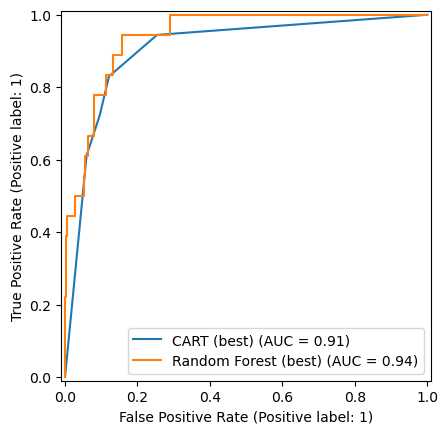

In [13]:
train_p = training_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))
valid_p = validation_df.with_columns((pl.col("Allstar").str.to_lowercase()=="yes").cast(pl.Int8).alias("y"))

drop_cols = {"Allstar","y","playerID","TrainingValidation","yearID"}
feat = [c for c in train_p.columns if c not in drop_cols]

Xtr = train_p.select(feat).to_numpy(); ytr = train_p.select("y").to_numpy().ravel()
Xva = valid_p.select(feat).to_numpy(); yva = valid_p.select("y").to_numpy().ravel()

cart = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, min_samples_split=2,
                              class_weight="balanced", random_state=42).fit(Xtr,ytr)
rf   = RandomForestClassifier(n_estimators=400, max_depth=5, min_samples_leaf=3, min_samples_split=2,
                              class_weight="balanced", random_state=42, n_jobs=-1).fit(Xtr,ytr)
ax = plt.gca()
RocCurveDisplay.from_estimator(cart, Xva, yva, ax=ax, name="CART (best)")
RocCurveDisplay.from_estimator(rf,   Xva, yva, ax=ax, name="Random Forest (best)")
plt.show()
